In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from read_data import df
%load_ext autoreload
%autoreload 2

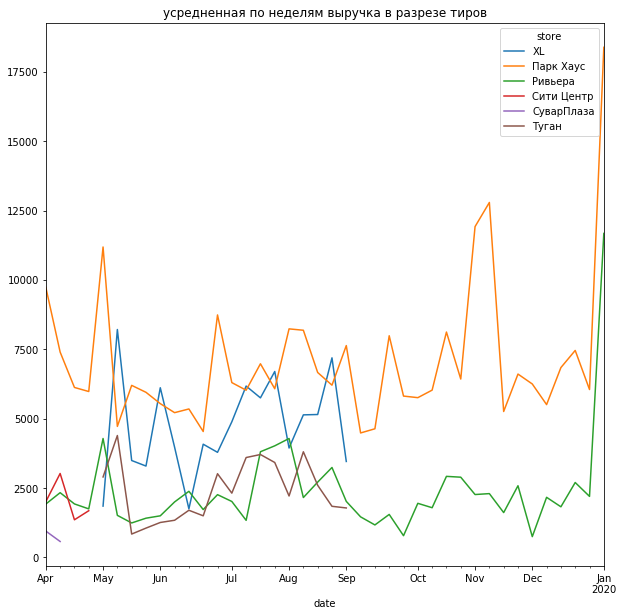

In [3]:
df.groupby(['store']).resample('W').mean()['income'].unstack(level=0)\
    .plot(legend=True, figsize=(10,10), title='усредненная по неделям выручка в разрезе тиров')


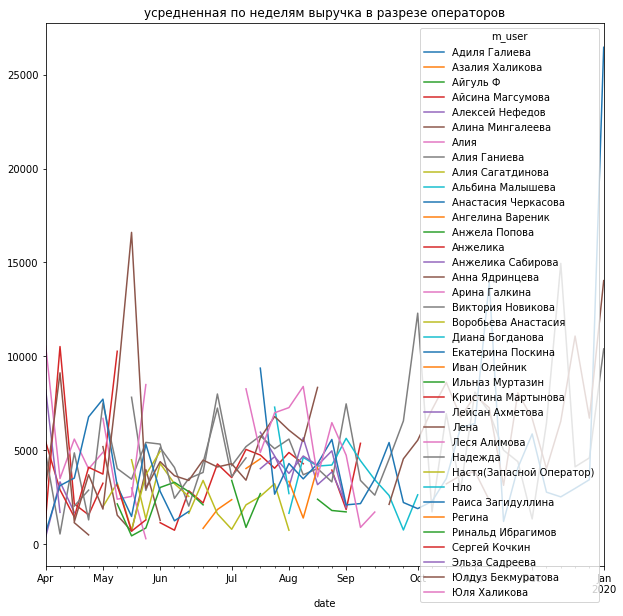

In [8]:
df.groupby(['m_user']).resample('W').mean()['income'].unstack(level=0)\
    .plot(legend=True, figsize=(10,10), title='усредненная по неделям выручка в разрезе операторов')

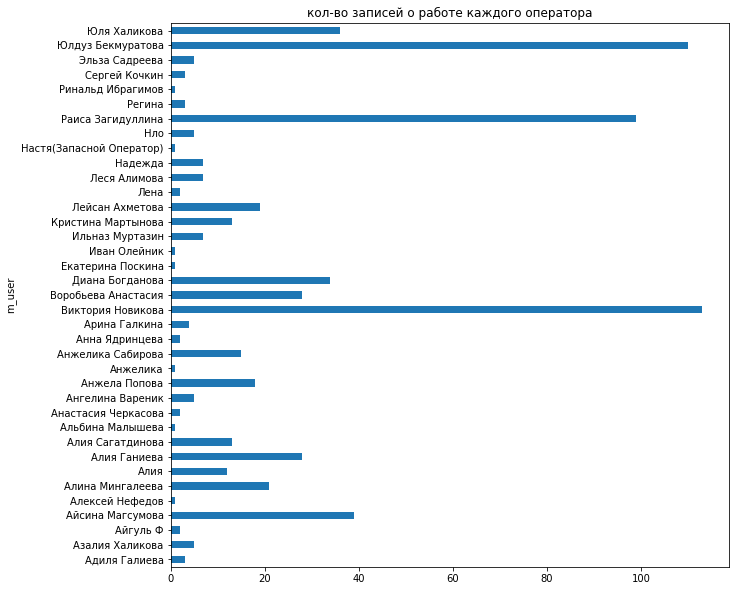

In [19]:
df.groupby(['m_user']).count()['income']\
    .plot(kind='barh', figsize=(10,10), title='кол-во записей о работе каждого оператора')

In [20]:
print(f"среднее кол-во записей про отдельного оператора: {df.groupby(['m_user']).count()['income'].mean():.1f}")
print(f"медиана кол-ва записей про отдельного оператора: {df.groupby(['m_user']).count()['income'].median():.1f}")

среднее кол-во записей про отдельного оператора: 18.0
медиана кол-ва записей про отдельного оператора: 5.0


средняя выручка в разрезе точек и операторов


In [89]:
user_ratings = (df.groupby(['store', 'm_user'])['income'].mean() \
/ df.groupby(['store']).income.mean() )

In [120]:
df.groupby(['store', 'm_user'])['income'].mean()

store  m_user           
XL     Адиля Галиева                NaN
       Азалия Халикова      4500.000000
       Айгуль Ф                     NaN
       Айсина Магсумова     7075.000000
       Алексей Нефедов              NaN
                               ...     
Туган  Ринальд Ибрагимов            NaN
       Сергей Кочкин        1716.666667
       Эльза Садреева               NaN
       Юлдуз Бекмуратова    3685.714286
       Юля Халикова         3165.000000
Name: income, Length: 222, dtype: float64

In [90]:
user_ratings = user_ratings.reset_index().groupby(['m_user']).mean().sort_values(by='income', ascending=False)

In [93]:
user_sc = df.groupby(['m_user']).income.count().reset_index().set_index('m_user')

In [97]:
u = pd.concat([user_ratings, user_sc],axis=1)

In [99]:
u.columns = ['rating', 'sample_count']

In [105]:
u = u.sort_values(by='rating', ascending=False)

In [ ]:
u

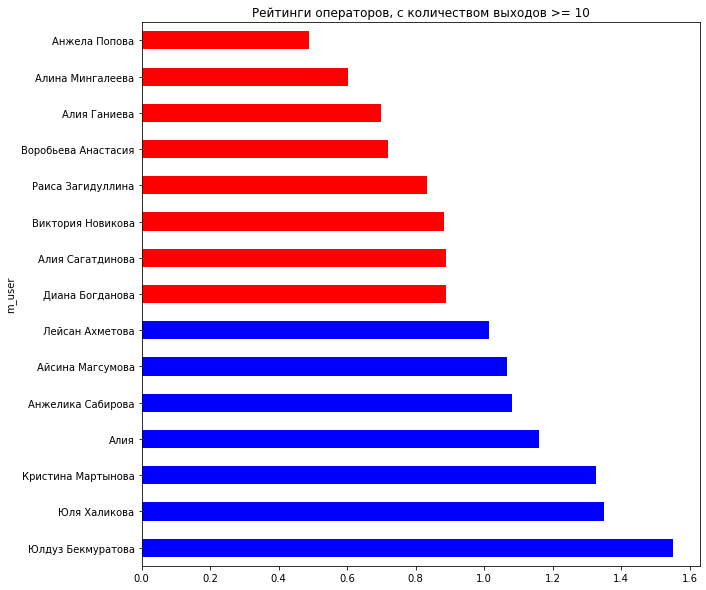

In [131]:
u[u.sample_count >= 10].rating.plot.barh(figsize=(10,10), 
                                         color=[ 'blue' if i>=1.0 else 'red' for i in u[u.sample_count >= 10].rating],
                                         title='Рейтинги операторов, с количеством выходов >= 10')

In [160]:
df['m_user']

date
2019-04-03      Виктория Новикова
2019-04-03    Анастасия Черкасова
2019-04-03          Адиля Галиева
2019-04-03         Эльза Садреева
2019-04-04      Виктория Новикова
                     ...         
2020-01-01      Юлдуз Бекмуратова
2020-01-02        Алексей Нефедов
2020-01-02      Юлдуз Бекмуратова
2020-01-03      Раиса Загидуллина
2020-01-03      Ринальд Ибрагимов
Name: m_user, Length: 667, dtype: category
Categories (37, object): [Адиля Галиева, Азалия Халикова, Айгуль Ф, Айсина Магсумова, ..., Сергей Кочкин, Эльза Садреева, Юлдуз Бекмуратова, Юля Халикова]

In [192]:
user_periods = pd.DataFrame()
user_periods['m_user'] = df['m_user']
user_periods['id'] = user_periods['m_user'].cat.codes


In [195]:
user_periods.shape

(667, 2)

In [201]:
user_periods.filter(u.index, axis=0)

,m_user,id
date,,


m_user
Адиля Галиева               AxesSubplot(0.125,0.2;0.775x0.68)
Азалия Халикова             AxesSubplot(0.125,0.2;0.775x0.68)
Айгуль Ф                    AxesSubplot(0.125,0.2;0.775x0.68)
Айсина Магсумова            AxesSubplot(0.125,0.2;0.775x0.68)
Алексей Нефедов             AxesSubplot(0.125,0.2;0.775x0.68)
Алина Мингалеева            AxesSubplot(0.125,0.2;0.775x0.68)
Алия                        AxesSubplot(0.125,0.2;0.775x0.68)
Алия Ганиева                AxesSubplot(0.125,0.2;0.775x0.68)
Алия Сагатдинова            AxesSubplot(0.125,0.2;0.775x0.68)
Альбина Малышева            AxesSubplot(0.125,0.2;0.775x0.68)
Анастасия Черкасова         AxesSubplot(0.125,0.2;0.775x0.68)
Ангелина Вареник            AxesSubplot(0.125,0.2;0.775x0.68)
Анжела Попова               AxesSubplot(0.125,0.2;0.775x0.68)
Анжелика                    AxesSubplot(0.125,0.2;0.775x0.68)
Анжелика Сабирова           AxesSubplot(0.125,0.2;0.775x0.68)
Анна Ядринцева              AxesSubplot(0.125,0.2;0.775x0.68)
А

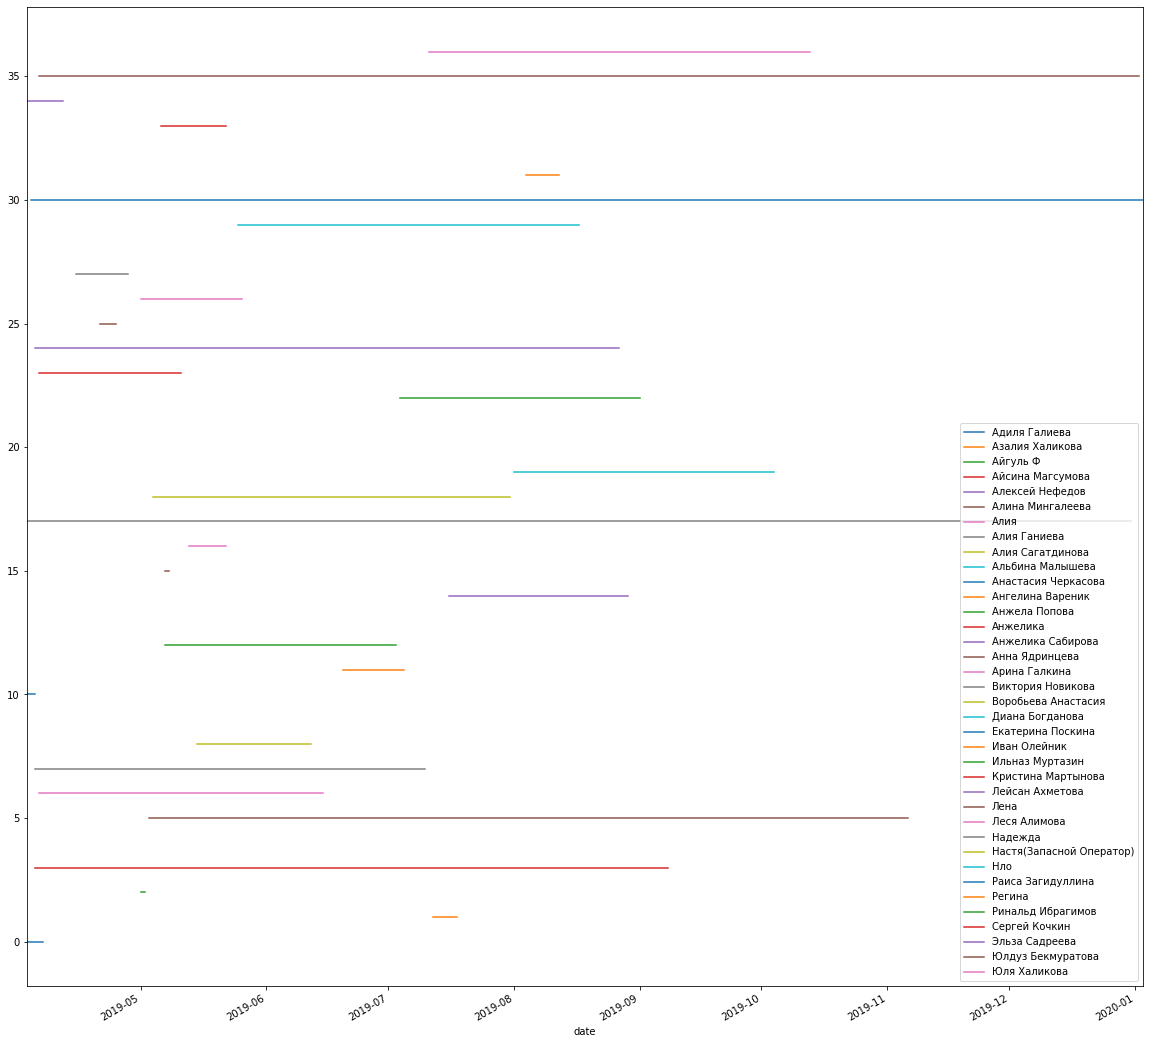

In [191]:
user_periods.groupby(['m_user']).id.plot(figsize=(20,20), legend=True)

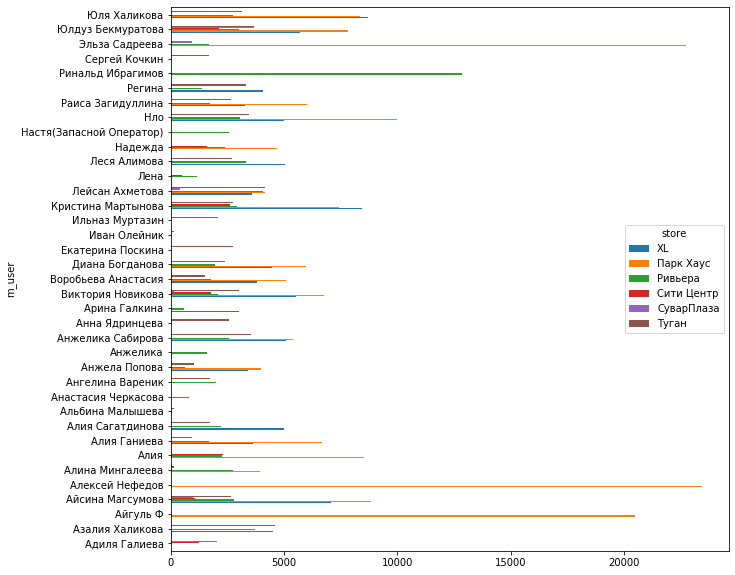

In [95]:
df.groupby(['store', 'm_user'])['income'].mean().unstack(level=0).plot.barh(figsize=(10,10))


In [12]:
cross_corr = df.corr()

In [13]:
cross_corr.income.sort_values(ascending=False).iloc[:30]
    # .plot(kind='barh', figsize=(10,10), title='топ корреляций с сырым значением дохода:')

income             1.000000
week_day           0.328669
year               0.315991
m_big_toys         0.235433
m_bolls            0.208153
m_candis           0.191953
m_mood             0.076974
month              0.064172
m_power_reserve    0.056844
m_small_toys       0.053304
m_pellet          -0.026964
m_medium_toys     -0.056765
day               -0.068686
Name: income, dtype: float64

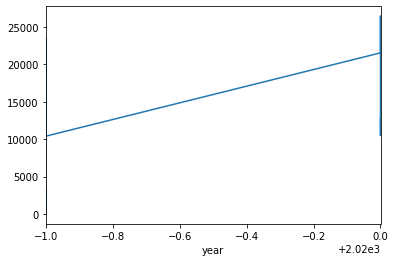

In [14]:
df.set_index('year').income.plot()


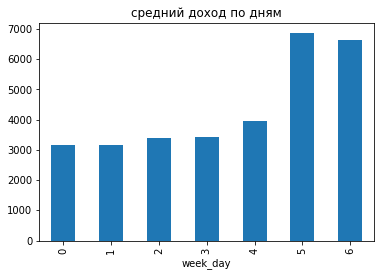

In [15]:
df.groupby(['week_day']).income.mean().plot(kind='bar', title='средний доход по дням')

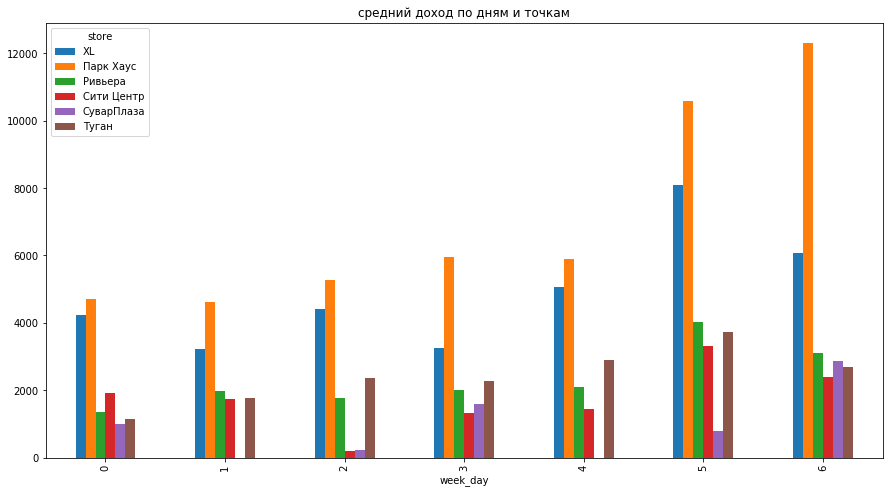

In [16]:
df.groupby(['week_day', 'store']).income.mean().unstack(level=1)\
    .plot(kind='bar', figsize=(15,8), title='средний доход по дням и точкам')

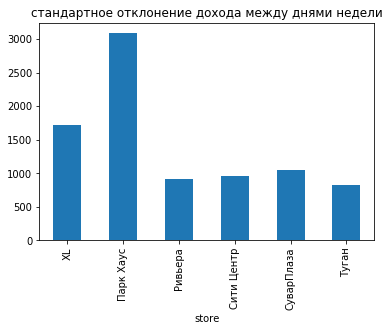

In [17]:
df.groupby(['week_day', 'store']).income.mean().unstack(level=1).std()\
    .plot(kind='bar',  title='стандартное отклонение дохода между днями недели')

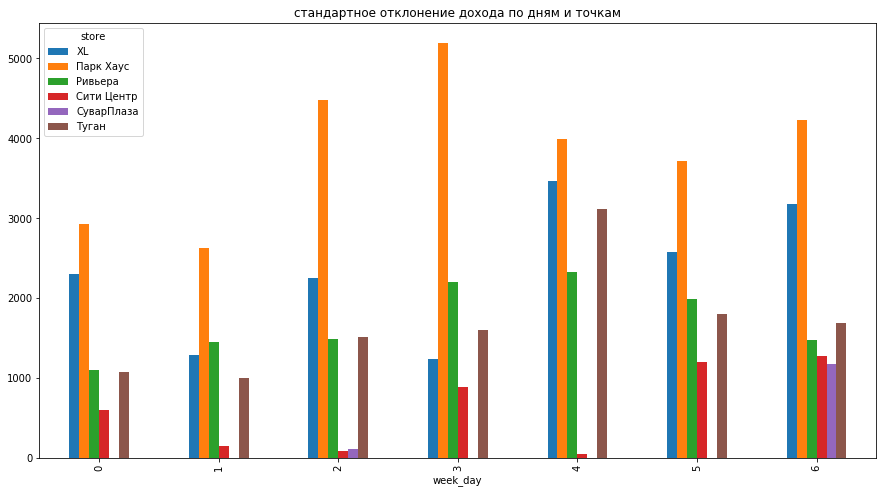

In [18]:
df.groupby(['week_day', 'store']).income.std().unstack(level=1)\
    .plot(kind='bar', figsize=(15,8), title='стандартное отклонение дохода по дням и точкам')



